In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import matplotlib.style as stl
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [2]:
data=pd.read_csv("E:\Data files/house_data.csv")
pd.set_option('display.max_columns', None)
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
data.shape

(4600, 18)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [7]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [8]:
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

We are interested in predicting the price of the house in quarters and months. So we need to work on the month column again.

In [9]:
import datetime as dt

In [11]:
data["date"] = pd.to_datetime(data["date"])

In [12]:
data['year'] =data["date"].dt.year
data['month'] = data["date"].dt.month
data['day'] = data["date"].dt.day
data['hour'] =data["date"].dt.hour
data['minute'] = data["date"].dt.minute
data['seconde'] = data["date"].dt.second

In [13]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,year,month,day,hour,minute,seconde
0,2014-05-02,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,2014,5,2,0,0,0
1,2014-05-02,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,2014,5,2,0,0,0
2,2014-05-02,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,2014,5,2,0,0,0
3,2014-05-02,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,2014,5,2,0,0,0
4,2014-05-02,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,2014,5,2,0,0,0


In [14]:
data_1 = data.copy()

Drppping the unneccesary columns

In [15]:
data.drop(["date"], axis=1, inplace=True)

In [17]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'street', 'city', 'statezip', 'country',
       'year', 'month', 'day', 'hour', 'minute', 'seconde'],
      dtype='object')

In [21]:
data["street"].value_counts()

2520 Mulberry Walk NE     4
2500 Mulberry Walk NE     3
9413 34th Ave SW          2
6008 8th Ave NE           2
11034 NE 26th Pl          2
                         ..
1404 Broadmoor Dr E       1
3249 E Ames Lake Dr NE    1
6032 35th Ave NE          1
1006 NE Ravenna Blvd      1
18717 SE 258th St         1
Name: street, Length: 4525, dtype: int64

The variability is almost not there as most of the houses are on different streets meaning this parameter might not play a big role in the price of the house

In [22]:
data['country'].value_counts()

USA    4600
Name: country, dtype: int64

There is no variability here, all houses are in the same country, the parameter can also be dropped

In [23]:
columns_drop = ["street", "country"]

In [24]:
data.drop(columns = columns_drop, axis=1, inplace=True)

In [25]:
stl.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [26]:
stl.use('ggplot')

C:\Users\SIMONK~1\AppData\Local\Temp/ipykernel_5624/514360887.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(12,6))


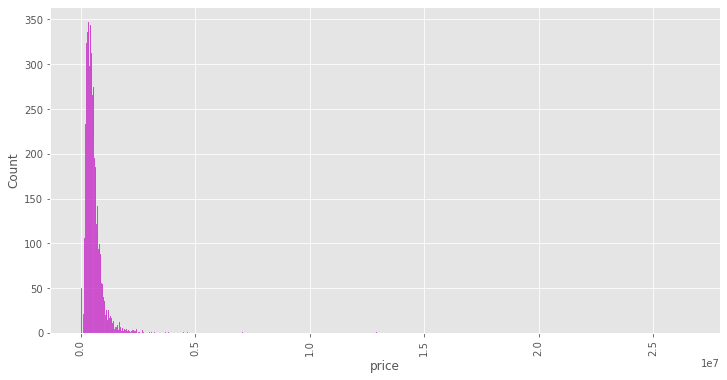

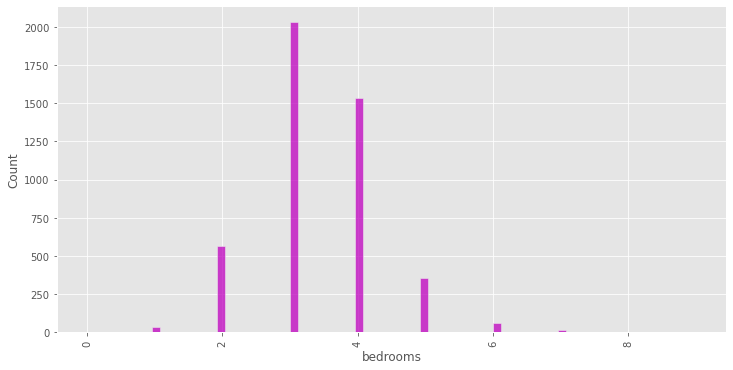

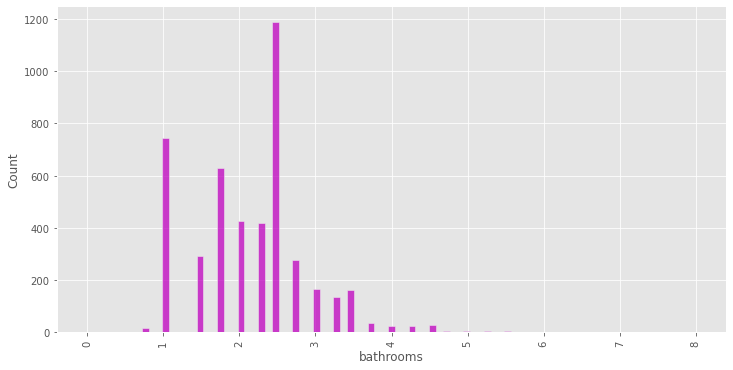

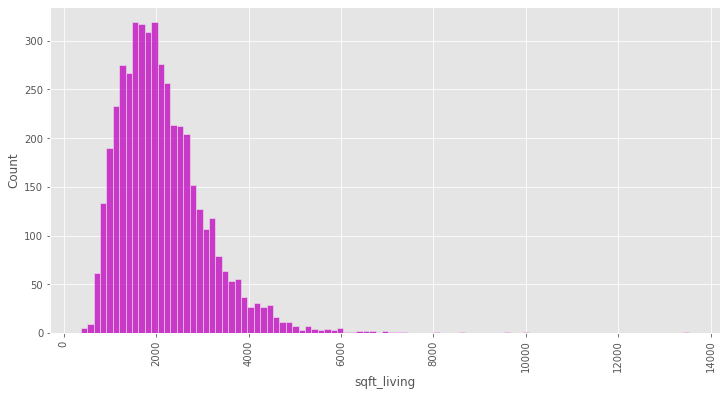

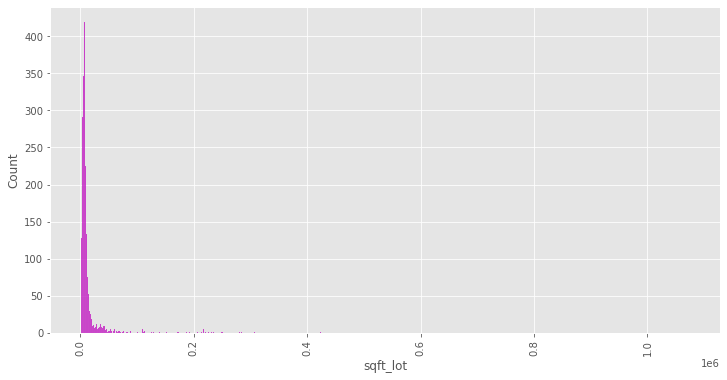

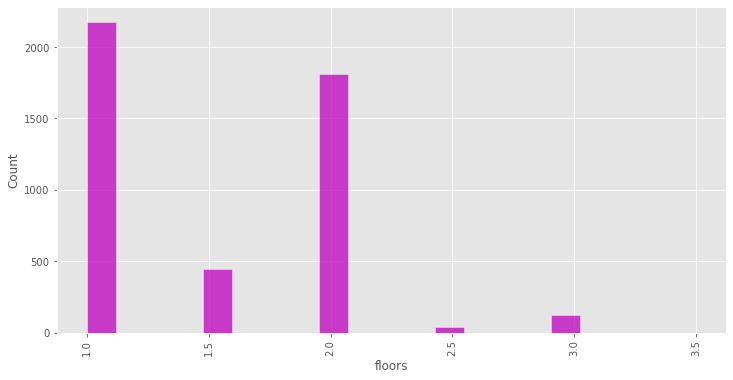

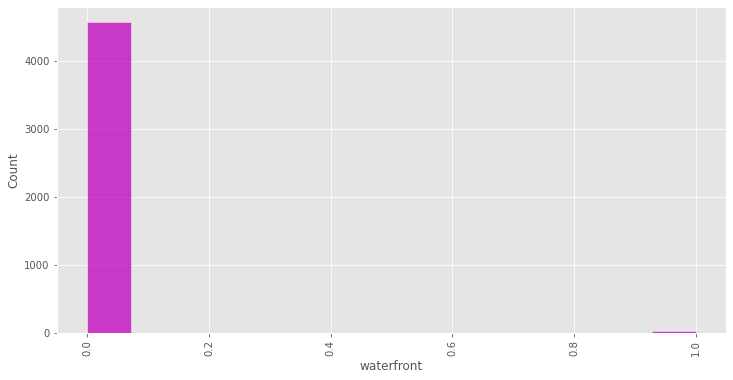

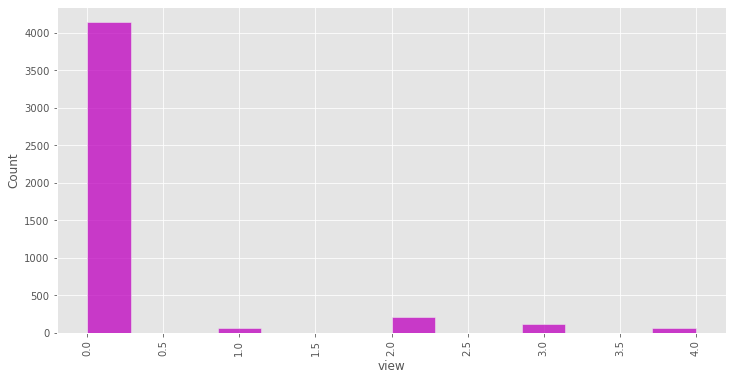

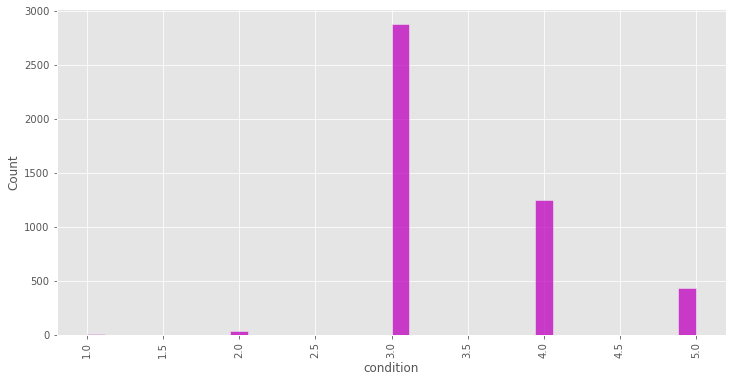

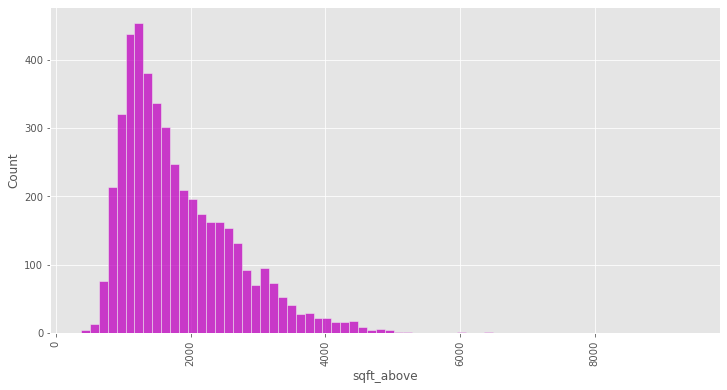

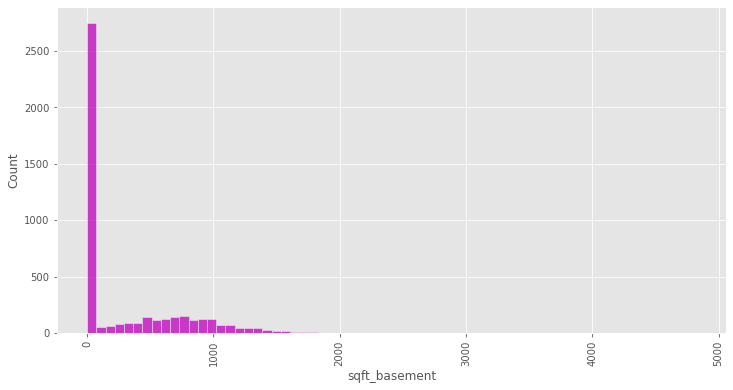

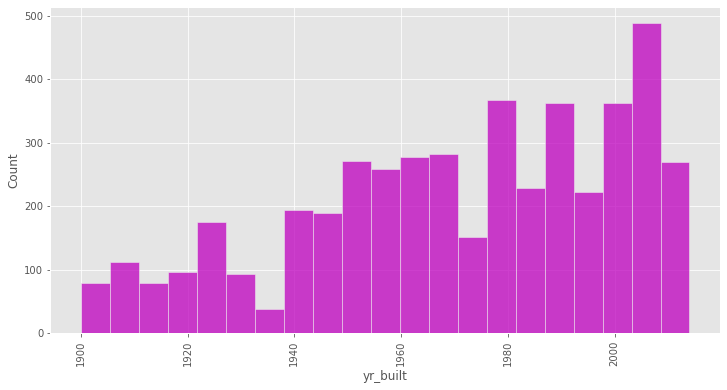

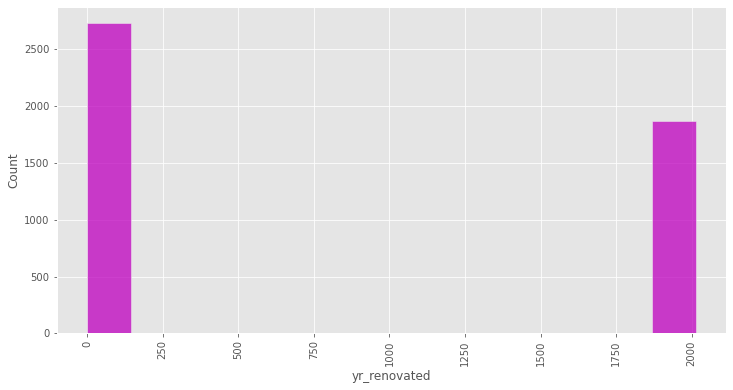

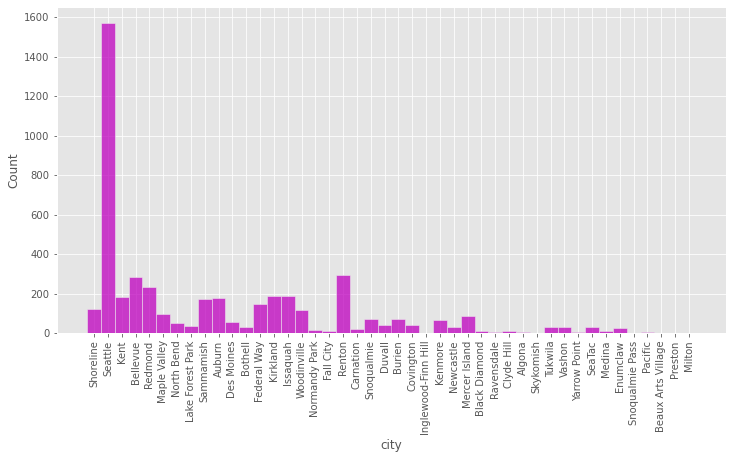

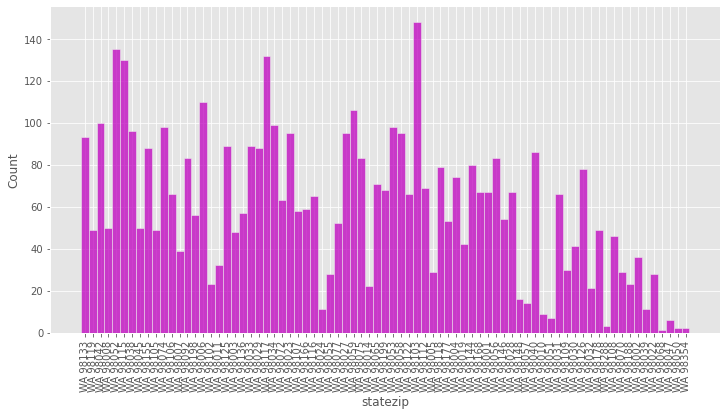

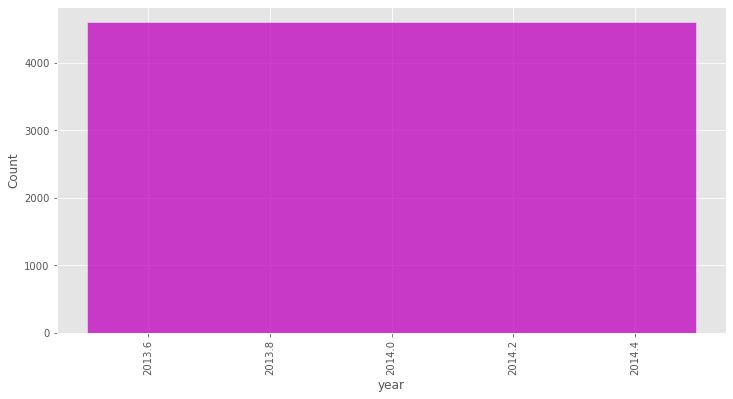

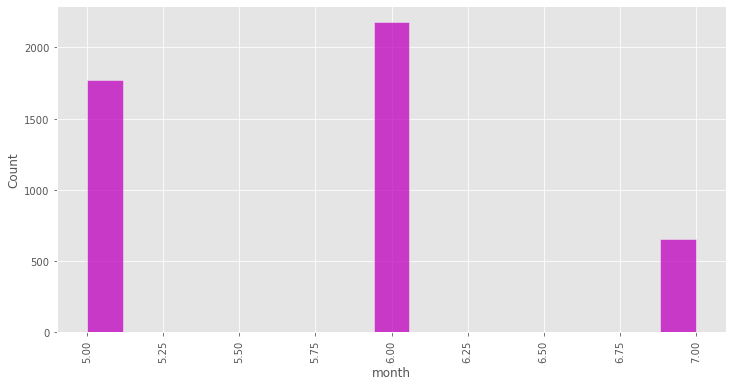

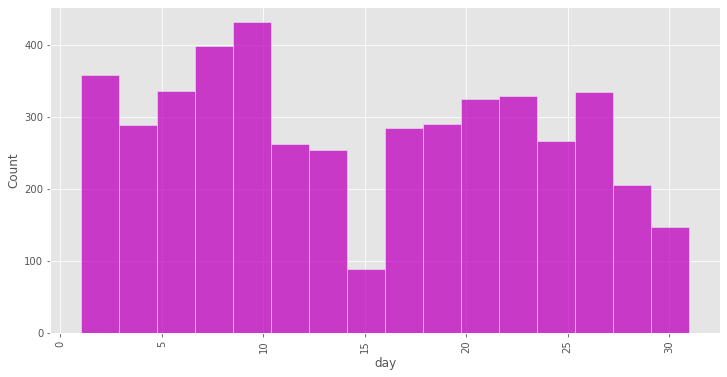

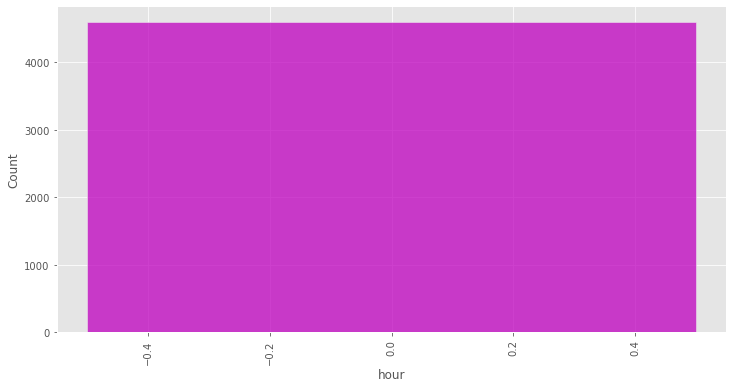

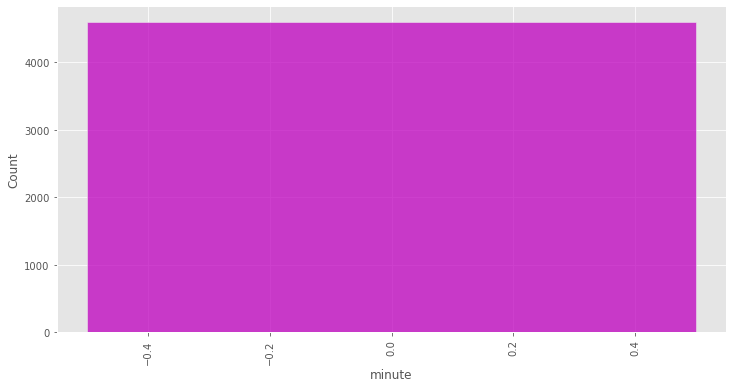

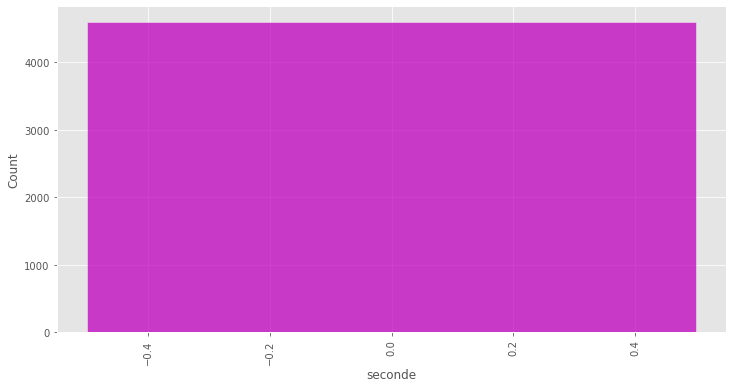

In [27]:
for col in data.columns:
    plt.figure(figsize=(12,6))
    sns.histplot(data[col], color="m")
    plt.xticks(rotation=90)
    plt.show

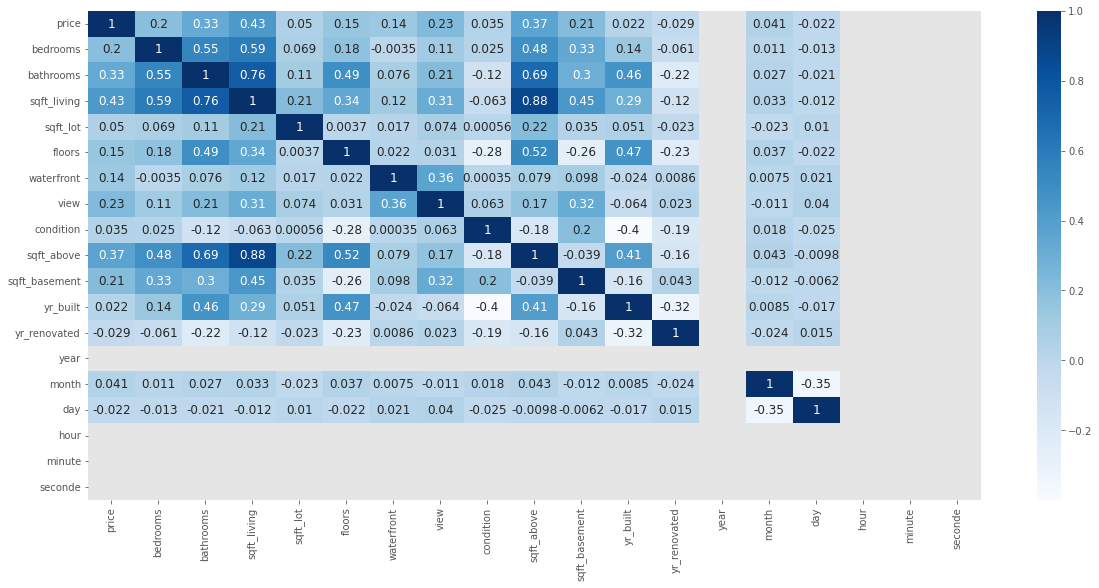

In [28]:
plt.figure(figsize=(20,9))
sns.heatmap(data.corr(), annot=True, cmap="Blues", annot_kws={"fontsize":12})
plt.show()

Dimensionality Reduction

We have to remove the non-numerical values and focus on the numerical

In [29]:
data=data.drop(["city", 'statezip'], axis=1)

In [30]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data = pca.fit_transform(data)

K_Means Cluster

In [33]:
from sklearn.cluster import KMeans

In [34]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(data)
cluster_labels = kmeans.predict(data)

In [35]:
cluster_labels

array([0, 3, 0, ..., 0, 0, 0])

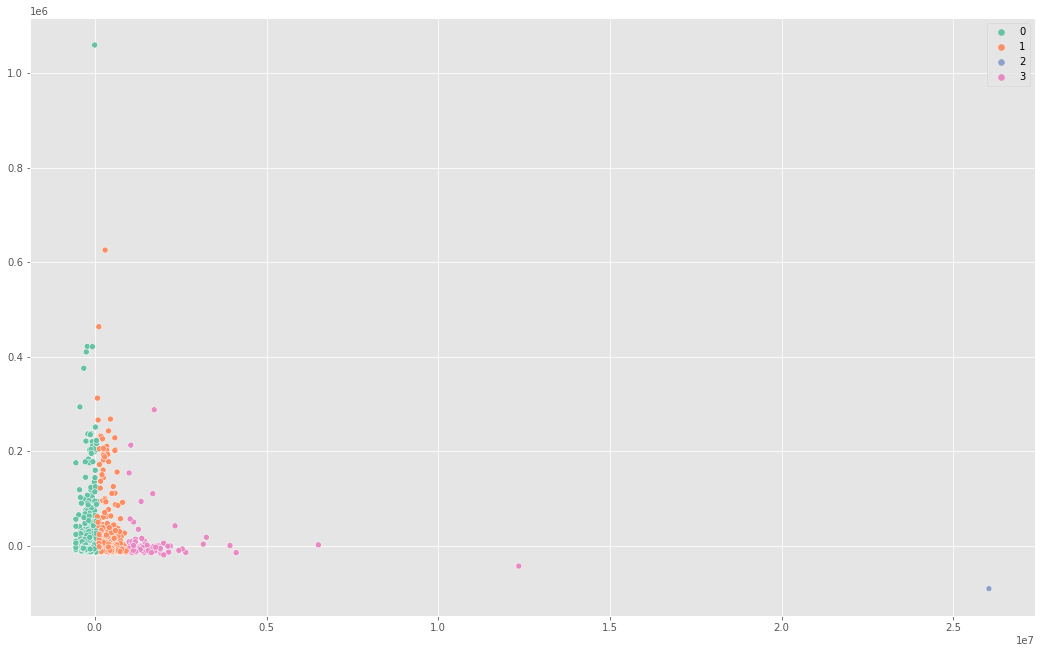

In [36]:
plt.figure(figsize=(18,11))
sns.scatterplot(x=data[:,0], y=data[:,1], hue=cluster_labels, palette="Set2")
plt.show()

In [37]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(data)
cluster_labels = kmeans.predict(data)

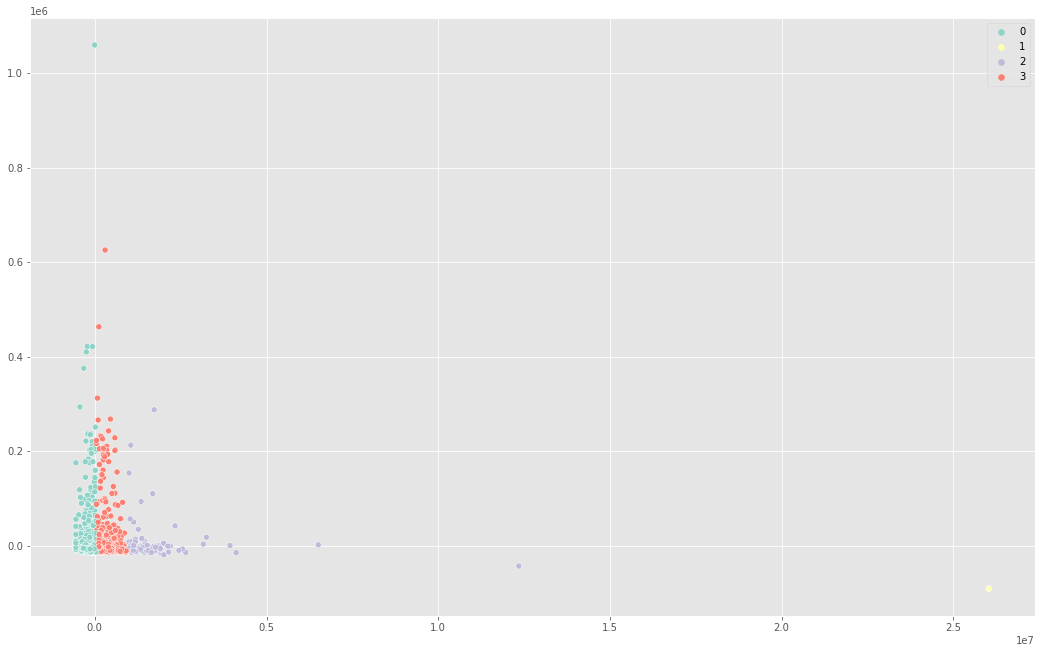

In [38]:
plt.figure(figsize=(18,11))
sns.scatterplot(x=data[:,0], y=data[:,1], hue=cluster_labels, palette="Set3")
plt.show()

DB SCAN Clustering

In [39]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
tsnedata = tsne.fit_transform(data)

In [41]:
from sklearn.cluster import DBSCAN

In [42]:
db_scan = DBSCAN(eps=0.6, min_samples=20).fit(tsnedata)

In [43]:
db_scan.labels_

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

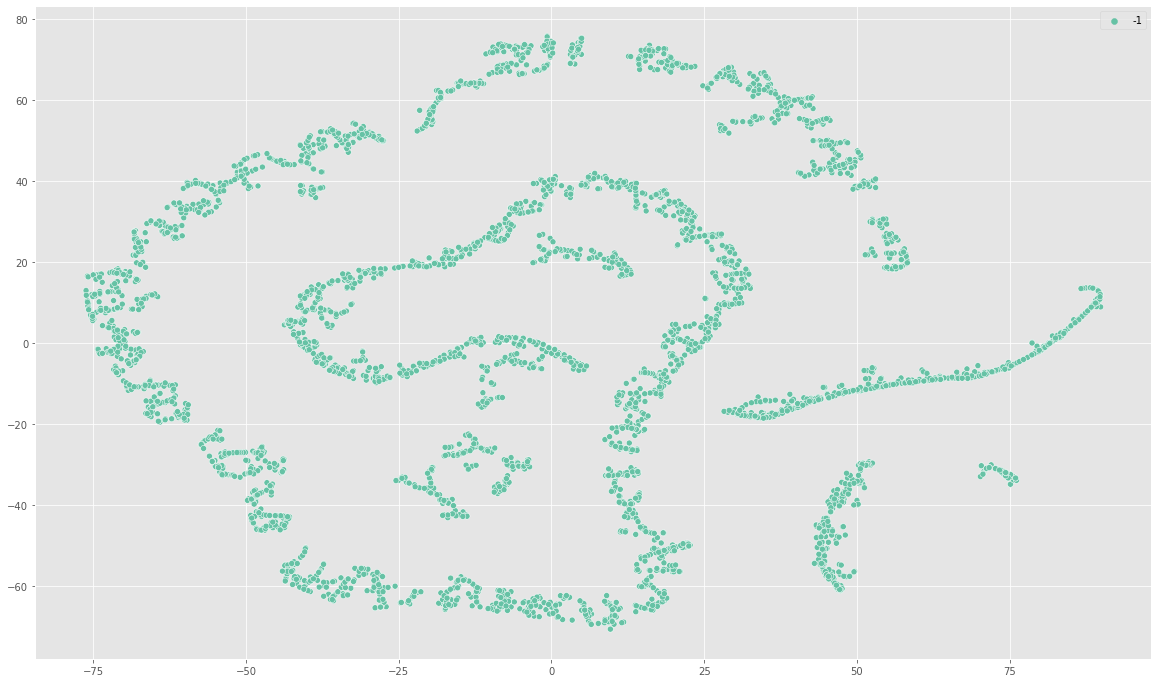

In [44]:
plt.figure(figsize=(20,12))
sns.scatterplot(x=tsnedata[:,0], y=tsnedata[:,1], hue=db_scan.labels_, palette="Set2")
plt.show()

Gaussian Mixture clustering

In [45]:
from sklearn.mixture import GaussianMixture

In [46]:
gm = GaussianMixture(n_components=2, random_state=0).fit(tsnedata)
ls = gm.predict(tsnedata)

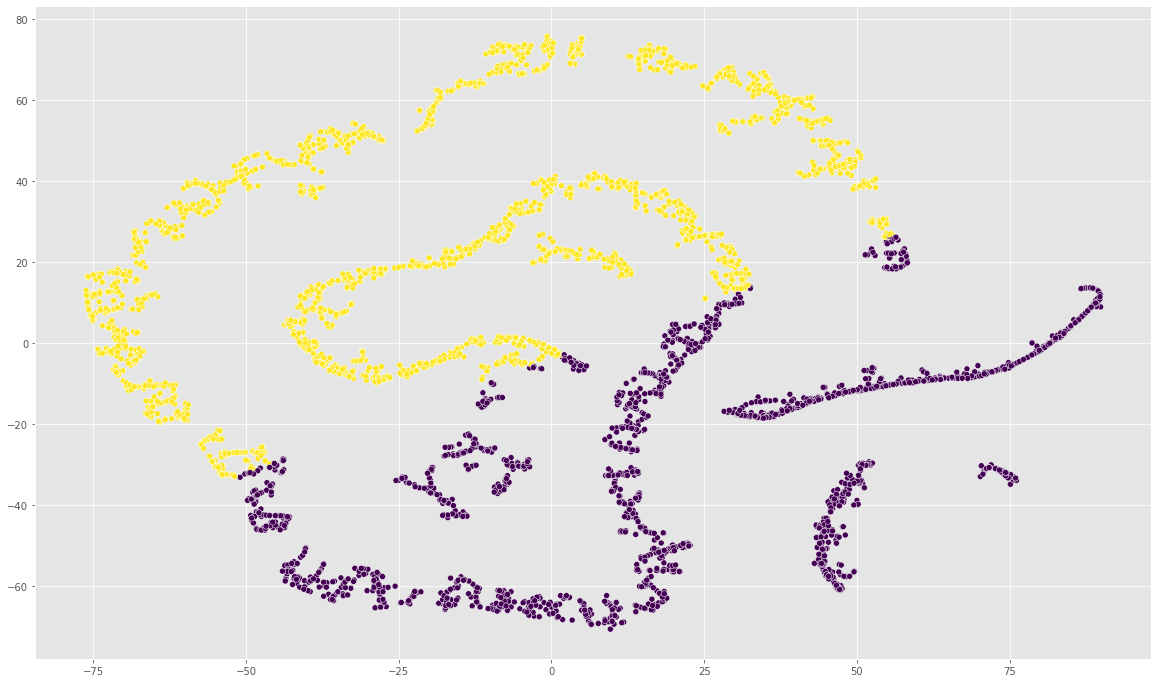

In [47]:
plt.figure(figsize=(20,12))
sns.scatterplot(x=tsnedata[:,0], y=tsnedata[:,1],c=ls ,palette="Set2")
plt.show()